# Name : Abhishek kumar
# Roll No : 001811001076
# Class : B.E. I.T. 4th year 1st semester 
# Subject name : Machine Learning
## Script for Question no 1

## Import required header files

In [1]:
import pandas as pd

from sklearn.datasets import load_wine # import datasets
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns

from sklearn.svm import SVC #import SVM classifier

from sklearn.tree import DecisionTreeClassifier # import decision tree classifier 

from sklearn.ensemble import RandomForestClassifier # import random forest classifier

from sklearn.naive_bayes import GaussianNB # import naive bayes classifier

## Load Wine Dataset

In [2]:
# load wine dataset
wine = load_wine()
dir(wine)

['DESCR', 'data', 'feature_names', 'frame', 'target', 'target_names']

In [3]:
wine.feature_names

['alcohol',
 'malic_acid',
 'ash',
 'alcalinity_of_ash',
 'magnesium',
 'total_phenols',
 'flavanoids',
 'nonflavanoid_phenols',
 'proanthocyanins',
 'color_intensity',
 'hue',
 'od280/od315_of_diluted_wines',
 'proline']

In [4]:
df = pd.DataFrame(wine.data, columns=wine.feature_names)
df.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0


In [5]:
df['target'] = wine.target
df.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0


In [6]:
wine.target_names

array(['class_0', 'class_1', 'class_2'], dtype='<U7')

In [7]:
df['target'].value_counts()

1    71
0    59
2    48
Name: target, dtype: int64

In [8]:
X = df.drop(['target'], axis='columns')
len(X)

178

In [9]:
y = df.target
len(y)

178

### training and test data split

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=0)

### Work for SVM classifier

In [11]:
model = SVC(kernel='linear')

In [12]:
model.fit(X_train, y_train)

SVC(kernel='linear')

In [13]:
model.score(X_test,y_test)

0.9814814814814815

In [14]:
y_pred = model.predict(X_test)
print(f"Accuracy: {100 * accuracy_score(y_test,y_pred)}%\n")
cf_matrix = confusion_matrix(y_test,y_pred)
print("Confusion Matrix:")
print(cf_matrix)
print("\nClassification Report:\n")
print(classification_report(y_test,y_pred))

Accuracy: 98.14814814814815%

Confusion Matrix:
[[19  0  0]
 [ 0 21  1]
 [ 0  0 13]]

Classification Report:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      0.95      0.98        22
           2       0.93      1.00      0.96        13

    accuracy                           0.98        54
   macro avg       0.98      0.98      0.98        54
weighted avg       0.98      0.98      0.98        54



Text(33.0, 0.5, 'Truth')

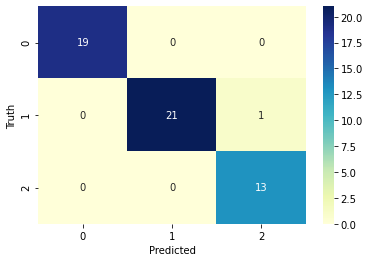

In [15]:
%matplotlib inline
sns.heatmap(cf_matrix,annot=True,cmap="YlGnBu")
plt.xlabel('Predicted')
plt.ylabel('Truth')

### Work for Decision Tree classifier

In [16]:
model = DecisionTreeClassifier(criterion='entropy')

In [17]:
model.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy')

In [18]:
model.score(X_test, y_test)

0.9259259259259259

In [19]:
y_pred = model.predict(X_test)
print(f"Accuracy: {100 * accuracy_score(y_test,y_pred)}%\n")
cf_matrix = confusion_matrix(y_test,y_pred)
print("Confusion Matrix:")
print(cf_matrix)
print("\nClassification Report:\n")
print(classification_report(y_test,y_pred))

Accuracy: 92.5925925925926%

Confusion Matrix:
[[18  1  0]
 [ 2 19  1]
 [ 0  0 13]]

Classification Report:

              precision    recall  f1-score   support

           0       0.90      0.95      0.92        19
           1       0.95      0.86      0.90        22
           2       0.93      1.00      0.96        13

    accuracy                           0.93        54
   macro avg       0.93      0.94      0.93        54
weighted avg       0.93      0.93      0.93        54



Text(33.0, 0.5, 'Truth')

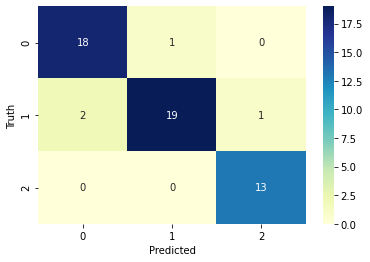

In [20]:
%matplotlib inline
sns.heatmap(cf_matrix,annot=True,cmap="YlGnBu")
plt.xlabel('Predicted')
plt.ylabel('Truth')

### Work for Random forest classifier

In [21]:
model = RandomForestClassifier()

In [22]:
model.fit(X_train,y_train)

RandomForestClassifier()

In [23]:
model.score(X_test,y_test)

0.9814814814814815

In [24]:
y_pred = model.predict(X_test)
print(f"Accuracy: {100 * accuracy_score(y_test,y_pred)}%\n")
cf_matrix = confusion_matrix(y_test,y_pred)
print("Confusion Matrix:")
print(cf_matrix)
print("\nClassification Report:\n")
print(classification_report(y_test,y_pred))

Accuracy: 98.14814814814815%

Confusion Matrix:
[[19  0  0]
 [ 0 21  1]
 [ 0  0 13]]

Classification Report:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      0.95      0.98        22
           2       0.93      1.00      0.96        13

    accuracy                           0.98        54
   macro avg       0.98      0.98      0.98        54
weighted avg       0.98      0.98      0.98        54



Text(33.0, 0.5, 'Truth')

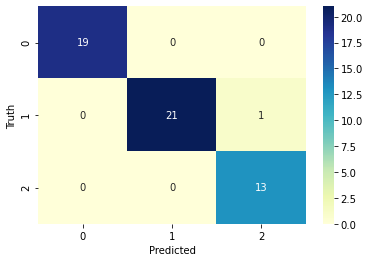

In [25]:
%matplotlib inline
sns.heatmap(cf_matrix,annot=True,cmap="YlGnBu")
plt.xlabel('Predicted')
plt.ylabel('Truth')

### Work for Naive Bayes Classifier

In [26]:
model = GaussianNB()

In [27]:
model.fit(X_train,y_train)

GaussianNB()

In [28]:
model.score(X_test, y_test)

0.9444444444444444

In [29]:
y_pred = model.predict(X_test)
print(f"Accuracy: {100 * accuracy_score(y_test,y_pred)}%\n")
cf_matrix = confusion_matrix(y_test,y_pred)
print("Confusion Matrix:")
print(cf_matrix)
print("\nClassification Report:\n")
print(classification_report(y_test,y_pred))

Accuracy: 94.44444444444444%

Confusion Matrix:
[[19  0  0]
 [ 2 19  1]
 [ 0  0 13]]

Classification Report:

              precision    recall  f1-score   support

           0       0.90      1.00      0.95        19
           1       1.00      0.86      0.93        22
           2       0.93      1.00      0.96        13

    accuracy                           0.94        54
   macro avg       0.94      0.95      0.95        54
weighted avg       0.95      0.94      0.94        54



Text(33.0, 0.5, 'Truth')

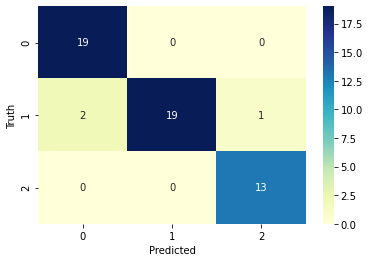

In [30]:
%matplotlib inline
sns.heatmap(cf_matrix,annot=True,cmap="YlGnBu")
plt.xlabel('Predicted')
plt.ylabel('Truth')

## Ionosphere Dataset

In [31]:
# load ionosphere dataset
df = pd.read_csv('ionosphere_data.csv')
df.head()

,column_a,column_b,column_c,column_d,column_e,column_f,column_g,column_h,column_i,column_j,...,column_z,column_aa,column_ab,column_ac,column_ad,column_ae,column_af,column_ag,column_ah,column_ai
0,True,False,0.99539,-0.05889,0.85243,0.02306,0.83398,-0.37708,1.00000,0.03760,...,-0.51171,0.41078,-0.46168,0.21266,-0.34090,0.42267,-0.54487,0.18641,-0.45300,g
1,True,False,1.00000,-0.18829,0.93035,-0.36156,-0.10868,-0.93597,1.00000,-0.04549,...,-0.26569,-0.20468,-0.18401,-0.19040,-0.11593,-0.16626,-0.06288,-0.13738,-0.02447,b
2,True,False,1.00000,-0.03365,1.00000,0.00485,1.00000,-0.12062,0.88965,0.01198,...,-0.40220,0.58984,-0.22145,0.43100,-0.17365,0.60436,-0.24180,0.56045,-0.38238,g
3,True,False,1.00000,-0.45161,1.00000,1.00000,0.71216,-1.00000,0.00000,0.00000,...,0.90695,0.51613,1.00000,1.00000,-0.20099,0.25682,1.00000,-0.32382,1.00000,b
4,True,False,1.00000,-0.02401,0.94140,0.06531,0.92106,-0.23255,0.77152,-0.16399,...,-0.65158,0.13290,-0.53206,0.02431,-0.62197,-0.05707,-0.59573,-0.04608,-0.65697,g


In [32]:
X = df.drop(['column_ai'],axis='columns')
len(X)

351

In [33]:
y = df['column_ai']
len(y)

351

### training and test split

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=0)

### Work for SVM classifier

In [35]:
model = SVC(kernel='linear')

In [36]:
model.fit(X_train,y_train)

SVC(kernel='linear')

In [37]:
model.score(X_test,y_test)

0.8679245283018868

In [38]:
y_pred = model.predict(X_test)
print(f"Accuracy: {100 * accuracy_score(y_test,y_pred)}%\n")
cf_matrix = confusion_matrix(y_test,y_pred)
print("Confusion Matrix:")
print(cf_matrix)
print("\nClassification Report:\n")
print(classification_report(y_test,y_pred))

Accuracy: 86.79245283018868%

Confusion Matrix:
[[31 13]
 [ 1 61]]

Classification Report:

              precision    recall  f1-score   support

           b       0.97      0.70      0.82        44
           g       0.82      0.98      0.90        62

    accuracy                           0.87       106
   macro avg       0.90      0.84      0.86       106
weighted avg       0.88      0.87      0.86       106



Text(33.0, 0.5, 'Truth')

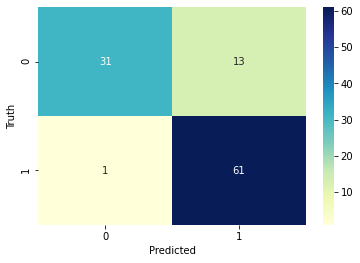

In [39]:
%matplotlib inline
sns.heatmap(cf_matrix,annot=True,cmap="YlGnBu")
plt.xlabel('Predicted')
plt.ylabel('Truth')

### Work for Decision Tree classifier

In [40]:
model = DecisionTreeClassifier(criterion='entropy')

In [41]:
model.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy')

In [42]:
model.score(X_test,y_test)

0.9339622641509434

In [43]:
y_pred = model.predict(X_test)
print(f"Accuracy: {100 * accuracy_score(y_test,y_pred)}%\n")
cf_matrix = confusion_matrix(y_test,y_pred)
print("Confusion Matrix:")
print(cf_matrix)
print("\nClassification Report:\n")
print(classification_report(y_test,y_pred))

Accuracy: 93.39622641509435%

Confusion Matrix:
[[38  6]
 [ 1 61]]

Classification Report:

              precision    recall  f1-score   support

           b       0.97      0.86      0.92        44
           g       0.91      0.98      0.95        62

    accuracy                           0.93       106
   macro avg       0.94      0.92      0.93       106
weighted avg       0.94      0.93      0.93       106



Text(33.0, 0.5, 'Truth')

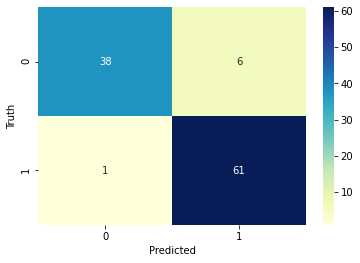

In [44]:
%matplotlib inline
sns.heatmap(cf_matrix,annot=True,cmap="YlGnBu")
plt.xlabel('Predicted')
plt.ylabel('Truth')

### Work for Random forest classifier

In [45]:
model = RandomForestClassifier()

In [46]:
model.fit(X_train,y_train)

RandomForestClassifier()

In [47]:
model.score(X_test,y_test)

0.9339622641509434

In [48]:
y_pred = model.predict(X_test)
print(f"Accuracy: {100 * accuracy_score(y_test,y_pred)}%\n")
cf_matrix = confusion_matrix(y_test,y_pred)
print("Confusion Matrix:")
print(cf_matrix)
print("\nClassification Report:\n")
print(classification_report(y_test,y_pred))

Accuracy: 93.39622641509435%

Confusion Matrix:
[[39  5]
 [ 2 60]]

Classification Report:

              precision    recall  f1-score   support

           b       0.95      0.89      0.92        44
           g       0.92      0.97      0.94        62

    accuracy                           0.93       106
   macro avg       0.94      0.93      0.93       106
weighted avg       0.93      0.93      0.93       106



Text(33.0, 0.5, 'Truth')

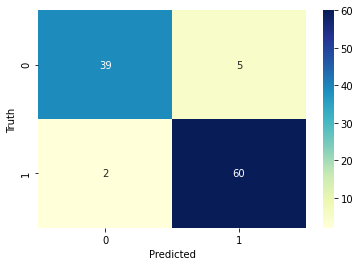

In [49]:
%matplotlib inline
sns.heatmap(cf_matrix,annot=True,cmap="YlGnBu")
plt.xlabel('Predicted')
plt.ylabel('Truth')

### Work for Nayes Bayes classifier

In [50]:
model = GaussianNB()

In [51]:
model.fit(X_train,y_train)

GaussianNB()

In [52]:
model.score(X_test,y_test)

0.9339622641509434

In [53]:
y_pred = model.predict(X_test)
print(f"Accuracy: {100 * accuracy_score(y_test,y_pred)}%\n")
cf_matrix = confusion_matrix(y_test,y_pred)
print("Confusion Matrix:")
print(cf_matrix)
print("\nClassification Report:\n")
print(classification_report(y_test,y_pred))

Accuracy: 93.39622641509435%

Confusion Matrix:
[[38  6]
 [ 1 61]]

Classification Report:

              precision    recall  f1-score   support

           b       0.97      0.86      0.92        44
           g       0.91      0.98      0.95        62

    accuracy                           0.93       106
   macro avg       0.94      0.92      0.93       106
weighted avg       0.94      0.93      0.93       106



Text(33.0, 0.5, 'Truth')

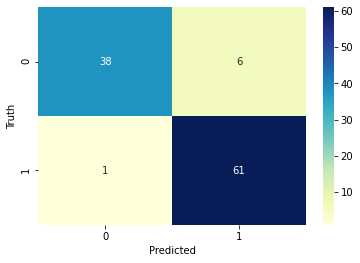

In [54]:
%matplotlib inline
sns.heatmap(cf_matrix,annot=True,cmap="YlGnBu")
plt.xlabel('Predicted')
plt.ylabel('Truth')